In [18]:
import pandas as pd #dataset
import numpy as np # matematis
import matplotlib.pyplot as plt #visual
from sklearn.model_selection import train_test_split #splitting dataset
import statsmodels.api as sm #model OLS
from sklearn.linear_model import BayesianRidge #model Bayes
from sklearn.svm import SVR #model SVM
from statsmodels.tools.eval_measures import rmse #evaluation model: RMSE

In [28]:

#read data
from google.colab import drive
drive.mount('/content/drive') #connect to gdrive

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_dataset.csv') #read csv
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [36]:
df.describe() #describing statistics of data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [39]:
df.corr() #korelasi antara lamanya berkerja vs salary


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


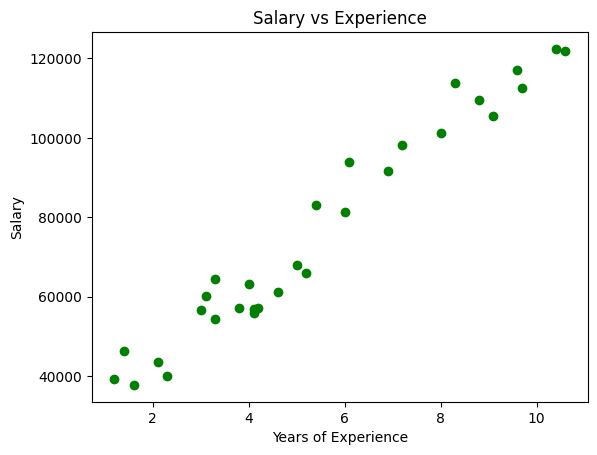

In [41]:
# Visualizing the dataset
plt.scatter(df['YearsExperience'], df['Salary'], color = 'green')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [42]:
#definisikan x sebagai shape 2 dimensi dan tidak skalar

YearsExperience = df[['YearsExperience']]
Salary = df['Salary']

In [47]:
YearsExperience_train, YearsExperience_test, Salary_train, Salary_test = train_test_split(YearsExperience, Salary, test_size=1/3, random_state=43)

In [48]:
YearsExperience_train

,YearsExperience
5,3.0
24,8.8
26,9.6
23,8.3
22,8.0
15,5.0
1,1.4
11,4.1
18,6.0
3,2.1


In [49]:
YearsExperience_test

,YearsExperience
25,9.1
12,4.1
13,4.2
6,3.1
7,3.3
8,3.3
10,4.0
20,6.9
9,3.8
29,10.6


In [50]:
Salary_train

5      56643.0
24    109432.0
26    116970.0
23    113813.0
22    101303.0
15     67939.0
1      46206.0
11     55795.0
18     81364.0
3      43526.0
28    122392.0
14     61112.0
2      37732.0
27    112636.0
19     93941.0
16     66030.0
21     98274.0
17     83089.0
0      39344.0
4      39892.0
Name: Salary, dtype: float64

In [51]:
Salary_test

25    105583.0
12     56958.0
13     57082.0
6      60151.0
7      54446.0
8      64446.0
10     63219.0
20     91739.0
9      57190.0
29    121873.0
Name: Salary, dtype: float64

In [52]:
model_OLS = sm.OLS(Salary_train, YearsExperience_train)
models = model_OLS.fit()
print(models.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              788.0
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    6.23e-17
Time:                        04:33:42   Log-Likelihood:                         -217.30
No. Observations:                  20   AIC:                                      436.6
Df Residuals:                      19   BIC:                                      437.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [53]:
Predict_Salary_OLS = models.predict(YearsExperience_test)
Predict_Salary_OLS

25    119301.401114
12     53751.180722
13     55062.185130
6      40641.136643
7      43263.145459
8      43263.145459
10     52440.176314
20     90459.304142
9      49818.167498
29    138966.467232
dtype: float64

In [54]:
Salary_test

25    105583.0
12     56958.0
13     57082.0
6      60151.0
7      54446.0
8      64446.0
10     63219.0
20     91739.0
9      57190.0
29    121873.0
Name: Salary, dtype: float64

In [55]:
#RMSE
RMSE_OLS = rmse(Salary_test, Predict_Salary_OLS)
RMSE_OLS

12733.080536540689

Bayessian Regression

In [56]:
model_BR = BayesianRidge()

In [57]:
model_BR = model_BR.fit(YearsExperience_train, Salary_train)

In [59]:
BayesianRidge()

BayesianRidge()

In [60]:
Predict_Salary_BR = model_BR.predict(YearsExperience_test)

In [61]:
Predict_Salary_BR

array([112122.9867291 ,  63857.24127202,  64822.55618116,  54204.0921806 ,
        56134.72199888,  56134.72199888,  62891.92636288,  90886.05872798,
        60961.29654459, 126602.71036622])

In [62]:
#RMSE
RMSE_BR = rmse(Salary_test, Predict_Salary_BR)
RMSE_BR

5431.476106059523

Support Vector Machine Regression

In [63]:
model_SVMR = SVR(kernel='rbf')

In [64]:
model_SVMR.fit(YearsExperience_train, Salary_train)
     

SVR()

In [65]:
Predict_Salary_SVMR = model_SVMR.predict(YearsExperience_test)

In [66]:
Predict_Salary_SVMR


array([74658.08317232, 74647.15805183, 74647.42304517, 74645.18272832,
       74645.46854301, 74645.46854301, 74646.903719  , 74655.77067007,
       74646.42944943, 74656.3488843 ])

In [67]:
#RMSE
RMSE_SVMR = rmse(Salary_test, Predict_Salary_SVMR)
RMSE_SVMR

22927.06409581127

Best Model

In [68]:

print('RMSE of Ordinary Least Square Model:', RMSE_OLS)
print('RMSE of Bayesian Regression Model:', RMSE_BR)
print('RMSE of Support Vector Machine Regression Model:', RMSE_SVMR)


RMSE of Ordinary Least Square Model: 12733.080536540689
RMSE of Bayesian Regression Model: 5431.476106059523
RMSE of Support Vector Machine Regression Model: 22927.06409581127
